<a href="https://colab.research.google.com/github/Black3rror/AI/blob/master/CIFAR_10_one_layer_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

We want to have a 1 FC layer model which can do the CIFAR-10 task partly, then we want to see what the weights of the model tell us and what does each of the 10 output neurons search in input

---
# importing stuff

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical

---
# Load the dataset

CIFAR-10:
0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

In [ ]:
(trainX_2d, trainy_int), (testX_2d, testy_int) = cifar10.load_data()

trainX = trainX_2d.reshape(trainX_2d.shape[0], -1)
testX = testX_2d.reshape(testX_2d.shape[0], -1)

trainy = to_categorical(trainy_int)
testy = to_categorical(testy_int)

trainX = trainX.astype("float32")/255
testX = testX.astype("float32")/255

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


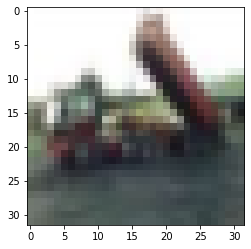

In [ ]:
# show a test
plt.imshow(trainX_2d[2])
print(trainy[2])

---
# Build the model

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape = (trainX.shape[1], ) ))
model.add(Activation('softmax'))

---
# Train the model

In [ ]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainy, validation_data=(testX, testy), batch_size=128, epochs=100)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                30730     
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 2s 4ms/step - loss: 1.9265 - accuracy: 0.3172 - val_loss: 1.8397 - val_accuracy: 0.3500
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.8260 - accuracy: 0.3611 - val_loss: 1.8681 - val_accuracy: 0.3451
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7985 - accuracy: 0.3727 - val_loss: 1.8414 - val_accuracy: 0.3630
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7790 

---
# convert weights to image to see whats going on

weights of each neuron shows an image. lets see that image

In [ ]:
print(weights[0][:, 0].shape)

(3072,)


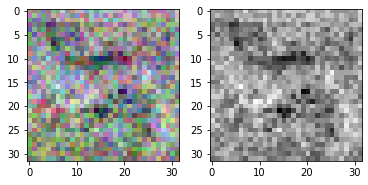

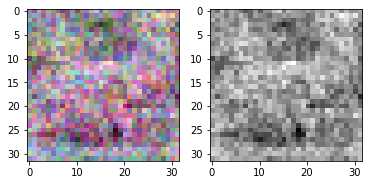

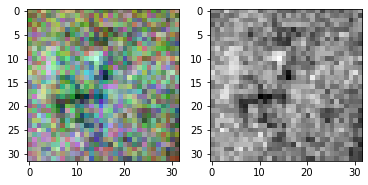

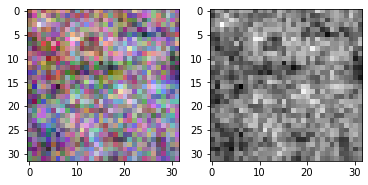

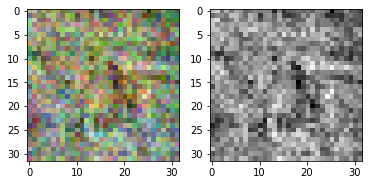

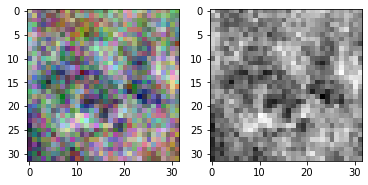

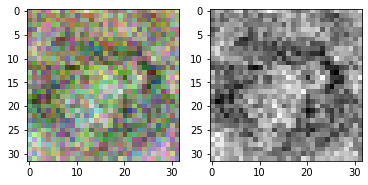

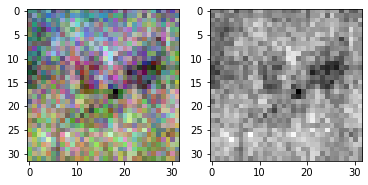

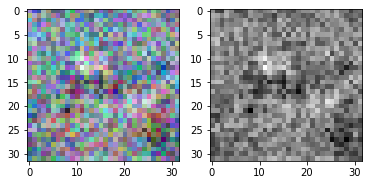

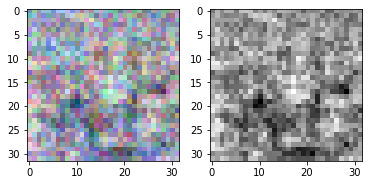

In [ ]:
for i in range(10):
  w_2d = weights[0][:, i].reshape(32, 32, 3)
  max_w = np.amax(w_2d)
  min_w = np.amin(w_2d)
  w_img = ( (w_2d - min_w) * (255/(max_w - min_w)) ).astype(int)
  w_img_gray = np.dot(w_img, [0.2989, 0.5870, 0.1140])
  fig, axs = plt.subplots(1, 2)
  axs[0].imshow(w_img)
  axs[1].imshow(w_img_gray)
  plt.show()

---
# Concolusion

we did not get a good result